# **CONTEXT:**
This is a Binary Classification Problem.It has the following columns 1.age, 2.sex, 3.chest pain type (4 values), 4.resting blood pressure, 5.serum cholestoral in mg/dl, 6.fasting blood sugar > 120 mg/dl, 7.resting electrocardiographic results (values 0,1,2), 8.maximum heart rate achieved, 9.exercise induced angina, 10.oldpeak = ST depression induced by exercise relative to rest, 11.the slope of the peak exercise ST segment, 12.number of major vessels (0-3) colored by flourosopy, 13thal: 0 = normal; 1 = fixed defect; 2 = reversable defect, And the target column

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data from the csv file using pandas library
data= pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# this cell is used to check all the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# this is used to check the statistics of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Exploratory Data Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

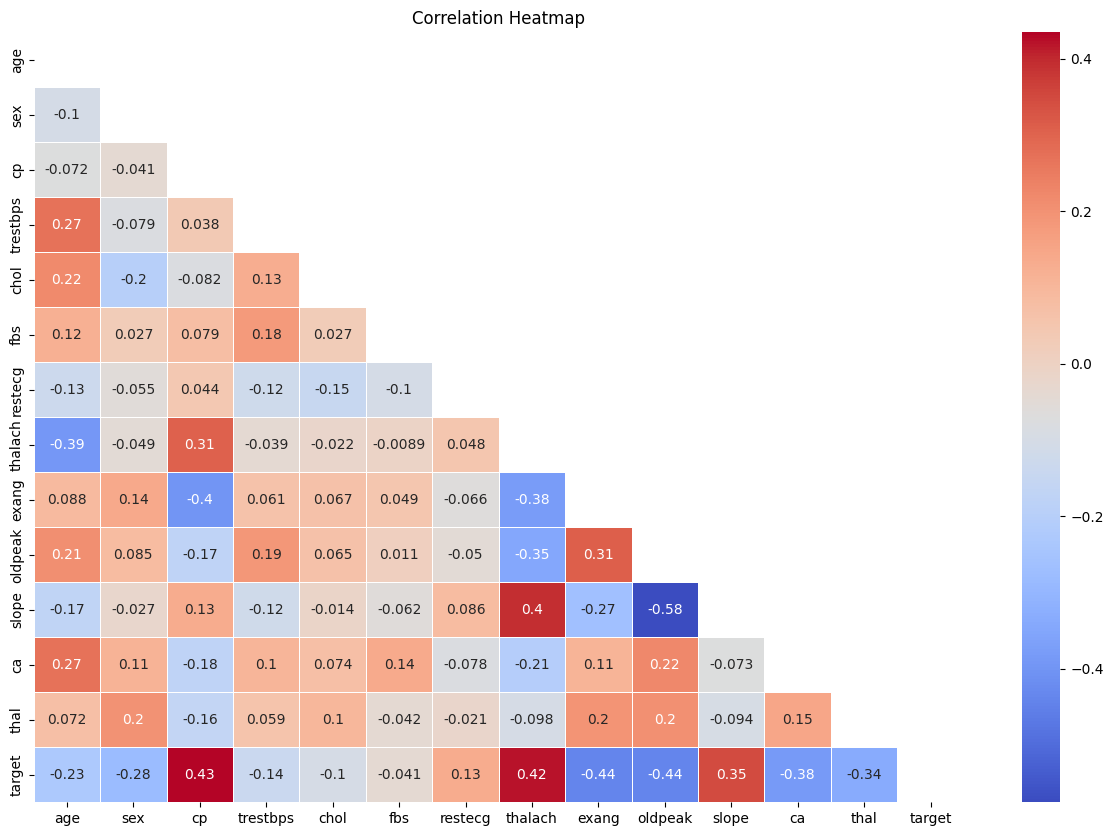

In [5]:
# checking the correlation between the features using heatmap
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5,mask=np.triu(corr_matrix))
plt.title('Correlation Heatmap')

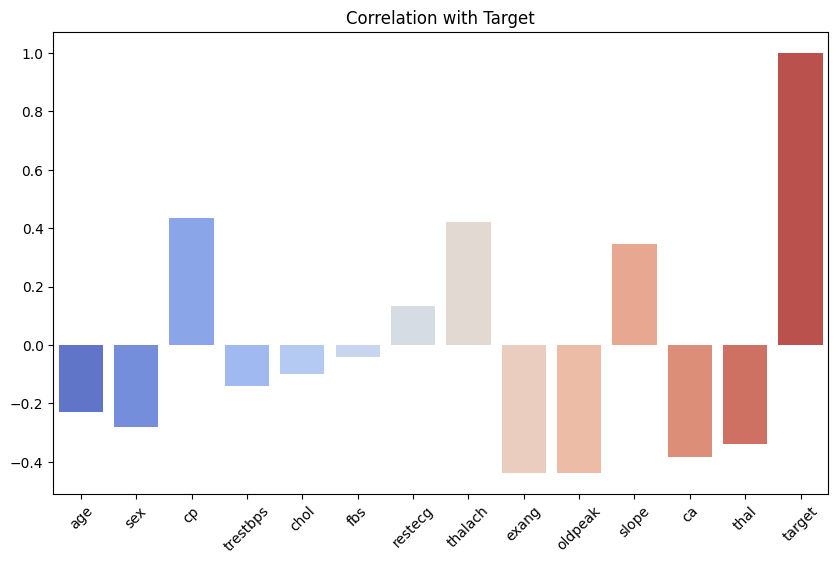

In [6]:
# checking the correlation between the features and the target freature using barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=data.corrwith(data.target).index, y=data.corrwith(data.target).values, palette='coolwarm')
plt.title('Correlation with Target')
plt.xticks(rotation=45)
plt.show()

In [7]:
discreate=[att for att in data.columns if data[att].value_counts().count()<10]
continous=[att for att in data.columns if data[att].value_counts().count()>10]
discreate,continous

(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'],
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

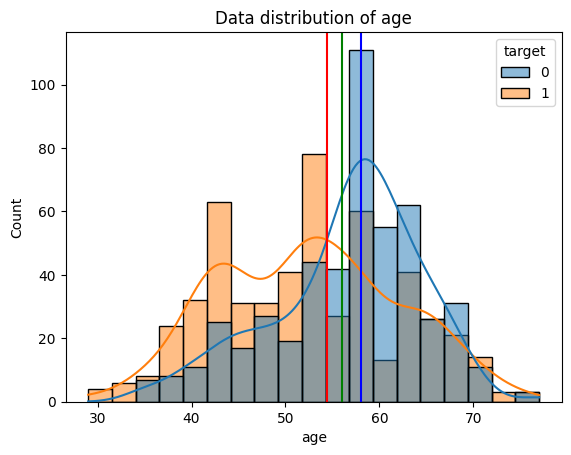

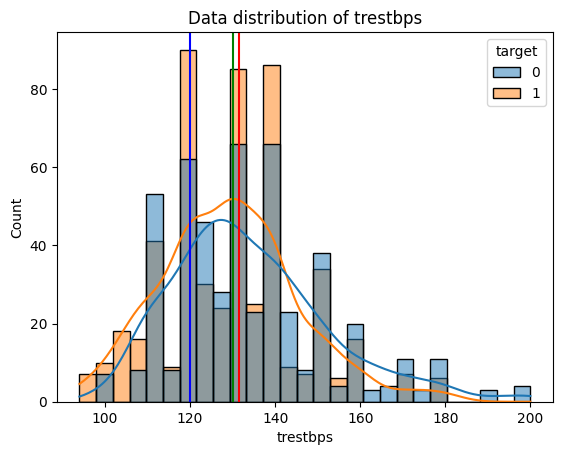

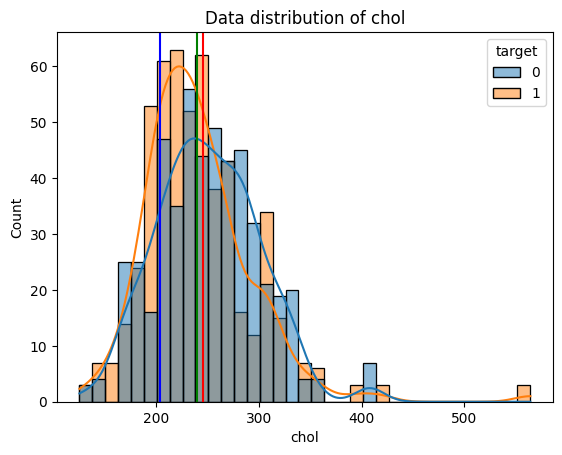

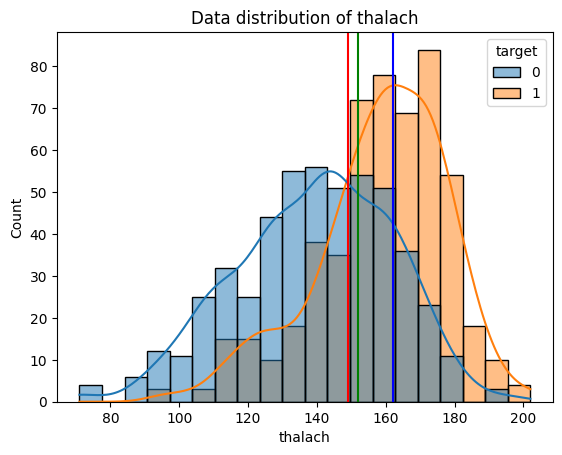

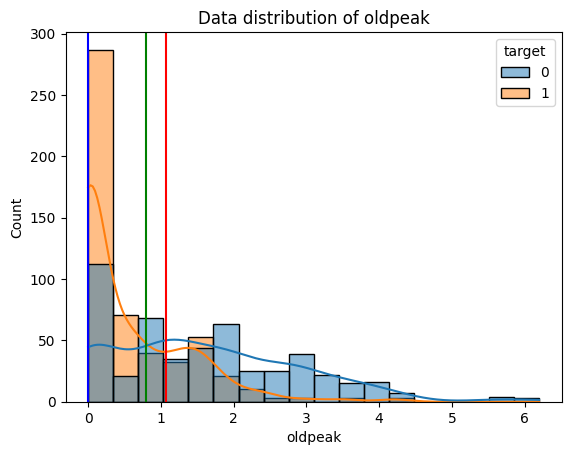

In [8]:
for att in continous:
  sns.histplot(data=data,x=att,hue='target',kde=True)
  plt.axvline(data[att].mean(),color='red')
  plt.axvline(data[att].median(),color='green')
  plt.axvline(data[att].mode()[0],color='blue')
  plt.title(f"Data distribution of {att}")
  plt.show()

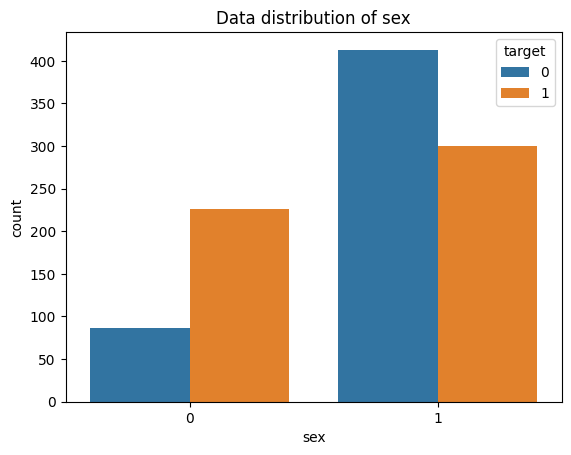

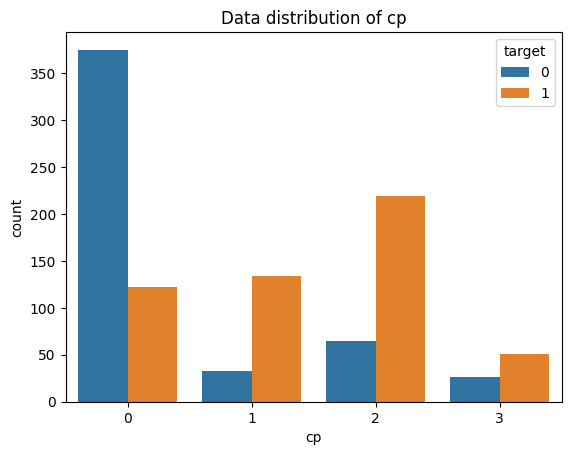

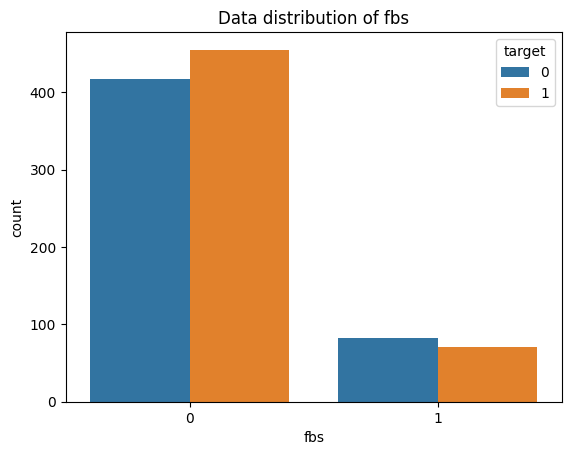

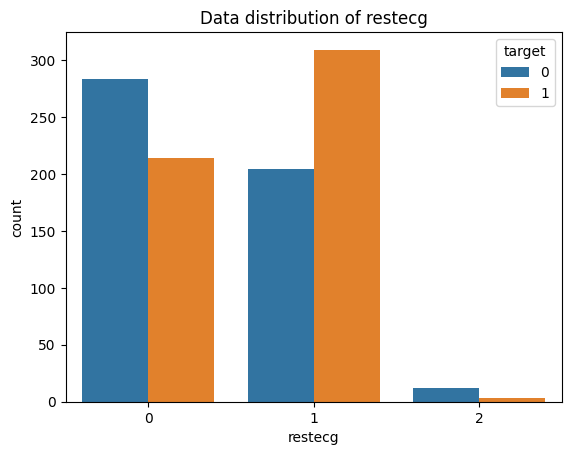

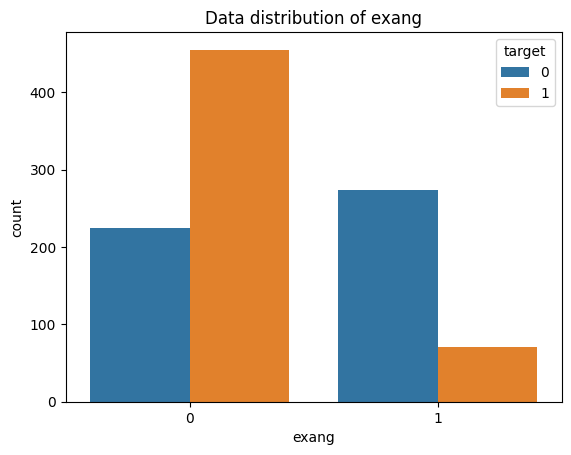

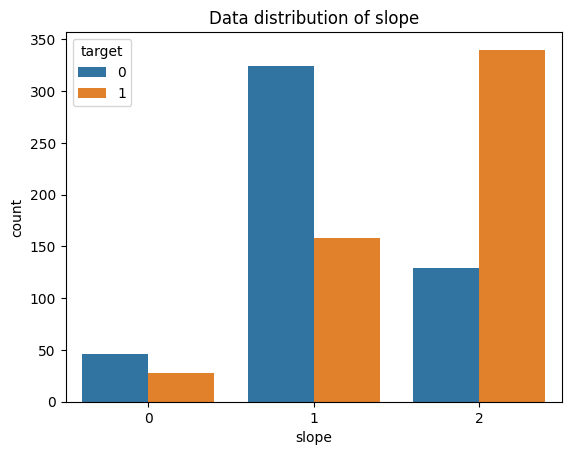

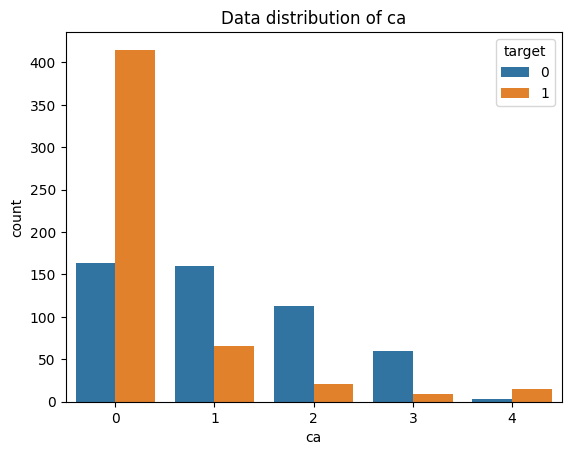

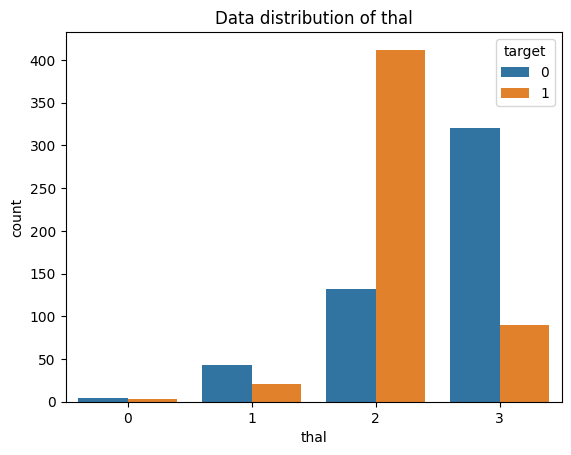

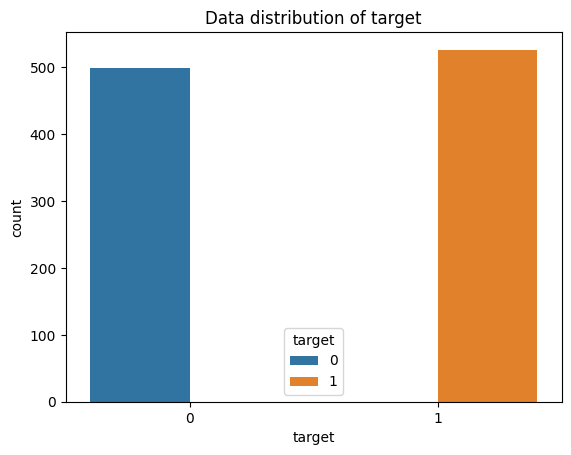

In [9]:
for att in discreate:
  sns.countplot(data=data,x=att,hue='target')
  plt.title(f"Data distribution of {att}")
  plt.show()

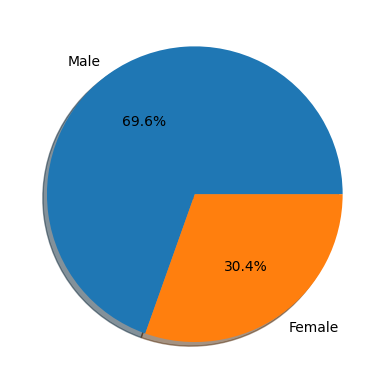

1    713
0    312
Name: sex, dtype: int64

In [10]:
plt.pie(data['sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True)
plt.show()
data['sex'].value_counts()

<Axes: xlabel='cp', ylabel='count'>

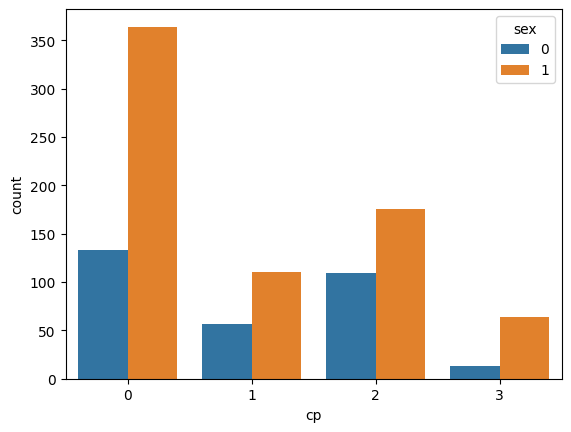

In [11]:
sns.countplot(data=data,x='cp',hue='sex')

<Axes: xlabel='thal', ylabel='count'>

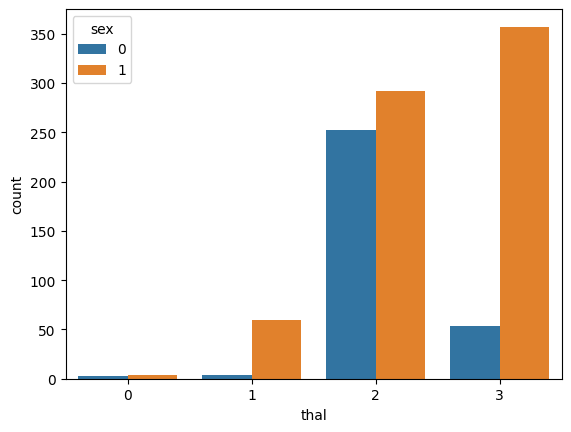

In [12]:
sns.countplot(data=data,x='thal',hue='sex')

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

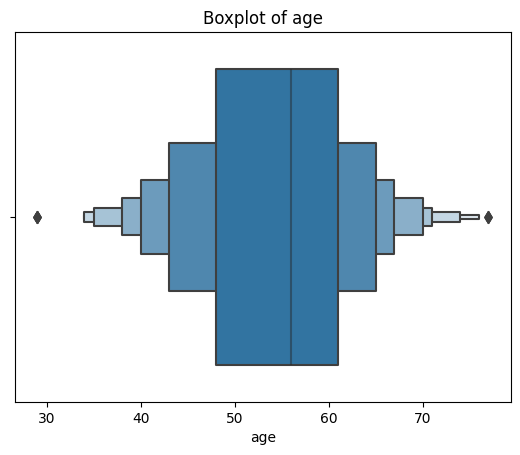

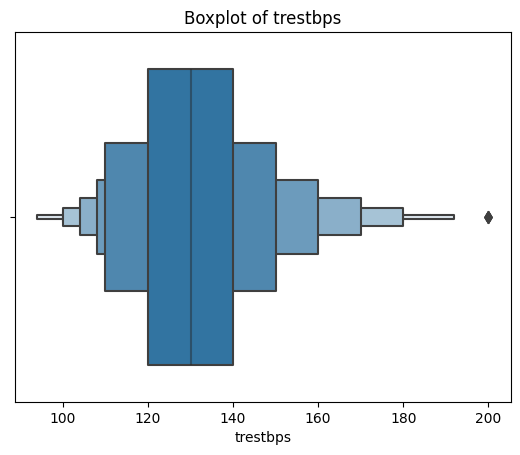

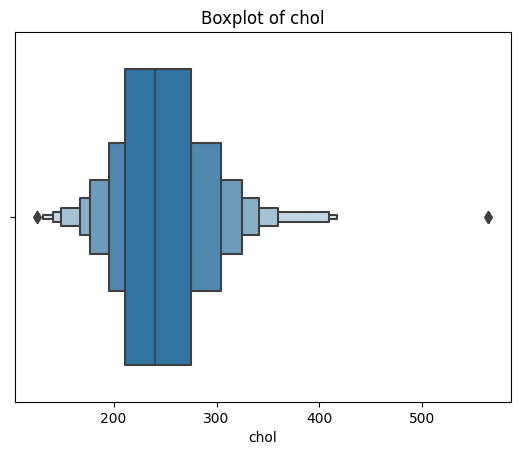

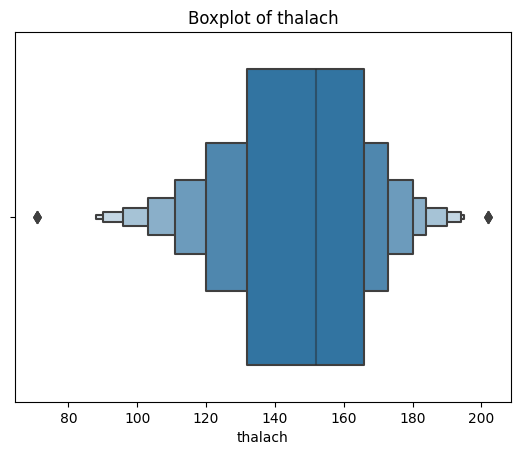

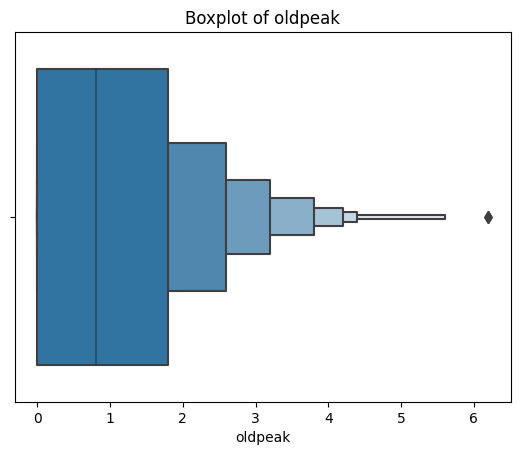

In [14]:
for i,att in enumerate(continous):
  sns.boxenplot(data=data,x=att)
  plt.title(f"Boxplot of {att}")
  plt.show()

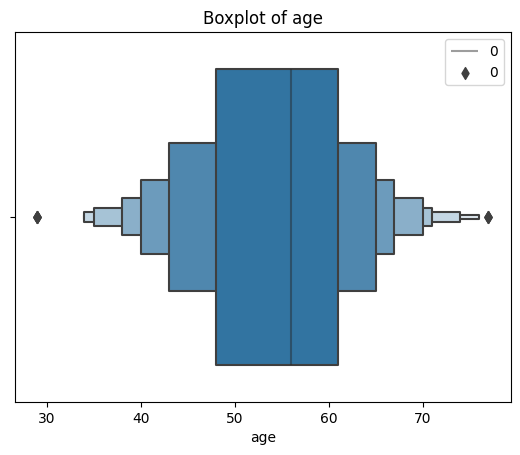

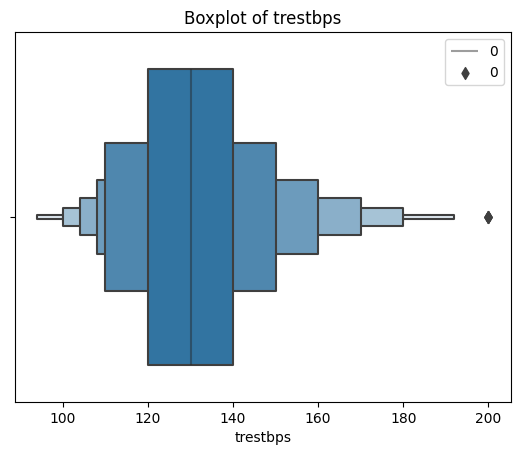

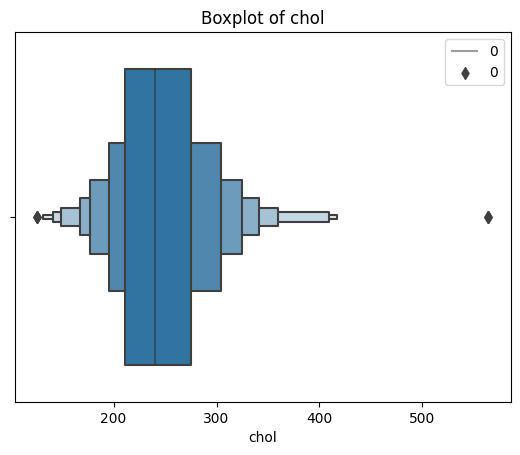

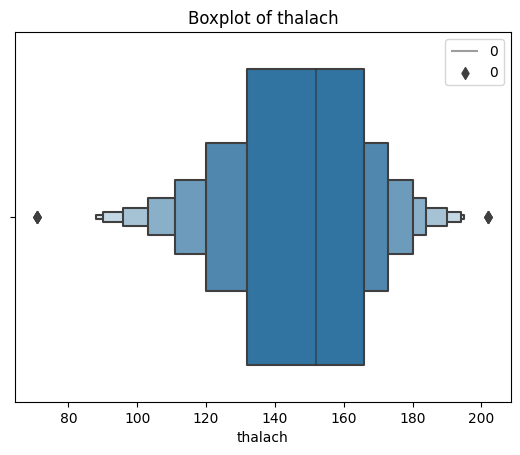

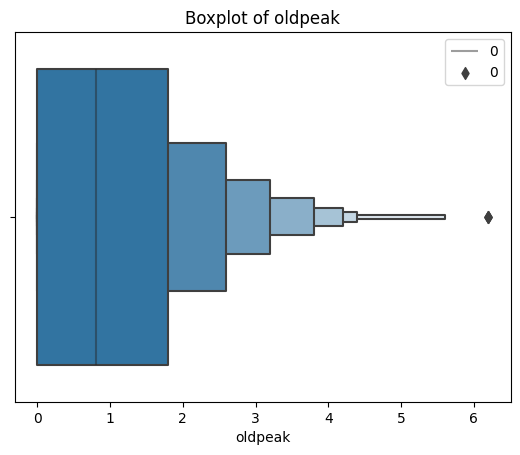

In [15]:
for i,att in enumerate(continous):
  sns.boxenplot(data=data,x=att,hue='target')
  plt.title(f"Boxplot of {att}")
  plt.legend(data.target)
  plt.show()

In [16]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# **Data Preprocessing**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [18]:
train=data.drop(columns=['target'],axis=1)
test=data['target']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=6)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [20]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)
x_train,x_test=pd.DataFrame(x_train,columns=train.columns),pd.DataFrame(x_test,columns=train.columns)

# **Machine Learning Models**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import make_pipeline,Pipeline

In [22]:
models=[
    ('logistic Regression',LogisticRegression(random_state=6)),
    ('Decision Tree',DecisionTreeClassifier(random_state=6)),
    ('Random Forest',RandomForestClassifier(random_state=6)),
    ('AdaBoost',AdaBoostClassifier(random_state=6)),
    ('Gradient Boosting',GradientBoostingClassifier(random_state=6)),
    ('KNN',KNeighborsClassifier()),
    ('SVC',SVC(random_state=6)),
    ("naive bayes",GaussianNB())
]

In [23]:
for name,model in models:
  pipeline=Pipeline([('model',model)])
  cross_acc=np.mean(cross_val_score(pipeline,x_train,y_train,cv=10,scoring='accuracy'))
  pipeline.fit(x_train,y_train)
  y_pred=pipeline.predict(x_test)
  test_acc=accuracy_score(y_test,y_pred)
  print(f"model name:{name}")
  print(f"cross validation accuracy:{cross_acc}")
  print(f"test accuracy:{test_acc}")
  print(f"confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n")
  print(f"classification report:\n{classification_report(y_test,y_pred)}\n")
  print()


model name:logistic Regression
cross validation accuracy:0.8451219512195122
test accuracy:0.8585365853658536
confusion matrix:
[[87 21]
 [ 8 89]]

classification report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       108
           1       0.81      0.92      0.86        97

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



model name:Decision Tree
cross validation accuracy:0.9865853658536585
test accuracy:0.9853658536585366
confusion matrix:
[[105   3]
 [  0  97]]

classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       0.97      1.00      0.98        97

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



mode

In [24]:
age=int(input("enter the age"))
sex=int(input("1-male,0-female:"))
cp=int(input("0-typical angina,1-atypical angina,2-non-anginal pain,3-asymptomatic:"))
trestbps=int(input("Resting blood pressure:"))
chol=int(input("serum cholestoral in mg/dl:"))
fbs=int(input("fasting blood sugar > 120 mg/dl:"))
restecg=int(input("0-normal,1-having ST-T wave abnormality,2-showing probable or definite left ventricular hypertrophy"))
thalach=int(input('maximum heart rate achieved,:'))
exang=int(input('exercise induced angina:'))
oldpeak=float(input('oldpeak = ST depression induced by exercise relative to rest:'))
slope=int(input("1-upsloping,2-flat,3-downsloping"))
ca=int(input('number of major vessels (0-3) colored by flourosopy:'))
thal=int(input("0-normal,1-fixed defect,2-reversable defect"))
print()

ValueError: invalid literal for int() with base 10: ''

In [ ]:
best_model=RandomForestClassifier(random_state=6).fit(x_train,y_train).predict(Scaler.transform([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))
best_model

C:\Users\Ashok_k6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Ashok_k6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)


# Output


*   Things that are observed from the above model


1.   The minimum age to have a heart disease start from 28 years old.
2.   Most of the males and females get are with heart disease at the age of 54 to 55 years.

3.  Most of the cases are caused due to lack of exercise and having high cholestorel levels



*   Most suited ML model for above Data

1.   Model - RandomForestClassifier
2.   Accuracy - 98.53%






